<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/AP-BigQ/ML/blob/main/Sebastian_PythonML/ch01/ch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>

</table>
<br>

#chapter 01

In [1]:
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt

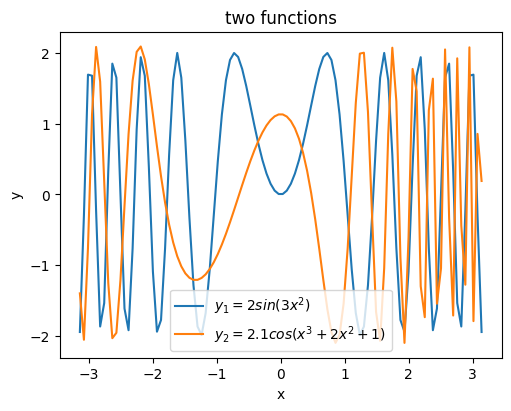

In [2]:


# 1. plot math functions
x = np.linspace(-np.pi, np.pi, 100)
y1 = 2*np.sin(3*x**2)
y2 = 2.1*np.cos(x**3+2*x**2+1)

# OOP mode, the figure is created explicitly
fig, ax = plt.subplots(figsize=(5,4), layout='constrained')

ax.plot(x, y1, label='$y_1=2sin(3x^2)$')
ax.plot(x, y2, label = '$y_2=2.1cos(x^3+2x^2+1)$')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('two functions')
ax.legend();

